<a href="https://colab.research.google.com/github/mikemenj/sales-predictions/blob/main/Sales_Predicitons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Data

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
filename = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT2cVPGO2r3G0WxbJBzw3cnLkRUM5vGfRBddW0iona-fQbp7T9cDzexcnzVt1X4VBPbm1emXliT4cDP/pub?gid=1791942273&single=true&output=csv'
df = pd.read_csv(filename)

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Data Cleaning

In [5]:
#columns 12, #rows 8523

In [6]:
df.dtypes #types look correct

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df.duplicated().sum() #no duplicates

0

In [8]:
df.isna().sum() #Item_Weight and Outlet_Size have missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.isna()['Item_Weight'].value_counts(normalize=True) #17% of the data in Item_Weight is missing

False    0.828347
True     0.171653
Name: Item_Weight, dtype: float64

In [10]:
df.isna()['Outlet_Size'].value_counts(normalize=True) #28% of the data in Outlet_Size is missing

False    0.717236
True     0.282764
Name: Outlet_Size, dtype: float64

In [11]:
weight_null = df.isna().loc[:,'Item_Weight'] #assign filter for Item_Weight null values

In [12]:
size_null = df.isna().loc[:,'Outlet_Size'] #assign filter for Outlet_Size null values

In [13]:
df.loc[weight_null & size_null] #null values in weight and size do not overlap

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [14]:
df.loc[:,'Outlet_Size'].value_counts() #3 categories for outlet size: Medium, Small, High 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
df.loc[:,'Outlet_Size'].fillna('Unknown',inplace=True) #add new category for missing value as unknown to keep other data

In [16]:
df.loc[:,'Item_Weight'].mean() #avg weight of items is 12.858

12.857645184135976

In [17]:
df.loc[:,'Item_Weight'].fillna(12.858,inplace=True) #deleting entries with missing item_weight would remove 17% of the data so decided to impute the average inplace of the missing value since datatype is float

In [18]:
df.isna().sum() #Item_Weight and Outlet_Size no longer have missing values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
df.loc[:,'Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [20]:
df[df.loc[:,'Item_Identifier']=='FDW13']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
256,FDW13,8.500,Low Fat,0.098438,Canned,51.1324,OUT017,2007,Unknown,Tier 2,Supermarket Type1,259.6620
1141,FDW13,8.500,Low Fat,0.097866,Canned,51.1324,OUT035,2004,Small,Tier 2,Supermarket Type1,1350.2424
2190,FDW13,8.500,Low Fat,0.098283,Canned,51.3324,OUT018,2009,Medium,Tier 3,Supermarket Type2,934.7832
3928,FDW13,12.858,Low Fat,0.097411,Canned,52.7324,OUT027,1985,Medium,Tier 3,Supermarket Type3,2492.7552
3978,FDW13,8.500,Low Fat,0.098037,Canned,51.5324,OUT049,1999,Medium,Tier 1,Supermarket Type1,882.8508
6499,FDW13,8.500,Low Fat,0.098083,Canned,50.3324,OUT045,2002,Unknown,Tier 2,Supermarket Type1,675.1212
6587,FDW13,8.500,low fat,0.163839,Canned,51.3324,OUT010,1998,Unknown,Tier 3,Grocery Store,311.5944
7029,FDW13,8.500,Low Fat,0.097803,Canned,50.5324,OUT013,1987,High,Tier 3,Supermarket Type1,882.8508
8025,FDW13,12.858,Low Fat,0.171384,Canned,50.5324,OUT019,1985,Small,Tier 1,Grocery Store,207.7296
8032,FDW13,8.500,Low Fat,0.097885,Canned,52.5324,OUT046,1997,Small,Tier 1,Supermarket Type1,1194.4452


In [21]:
df.loc[:,'Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
df.loc[:,'Item_Fat_Content'] = df.loc[:,'Item_Fat_Content'].replace('LF','Low Fat') #replace 'LF' with 'Low Fat'

In [23]:
df.loc[:,'Item_Fat_Content'] = df.loc[:,'Item_Fat_Content'].replace('reg','Regular') #replace 'reg' with 'Regular'

In [24]:
df.loc[:,'Item_Fat_Content'] = df.loc[:,'Item_Fat_Content'].replace('low fat','Low Fat') #replace 'low fat' with 'Low Fat'

In [25]:
df.describe() #min, max, mean of each numeric column
#Item_Weight      min 4.56, max 21.35, mean 12.86
#Item Visibility  min 0.00, max 0.33, mean 12.86
#Item MRP         min 31.29, max 266.89, mean 140.99
#Outlet Establishment Year min 1985, max 2009, mean 1998
#Item Outlet Sales min 33.29, max 13086.96, mean 2181.29

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857706,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.858000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
df.describe().loc[['min','max','mean']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,12.857706,0.066132,140.992782,1997.831867,2181.288914


In [27]:
#Numeric Columns
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

0 - Item_Weight

1 - Item_Visibility

2 - Item_MRP

3 - Outlet_Establishment_Year

4 - Item_Outlet_Sales

Choose Column for Histogram
1




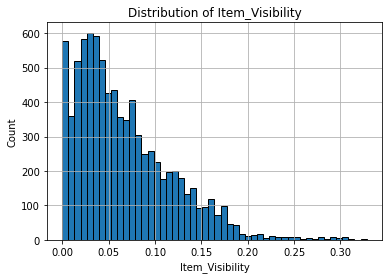

In [76]:
#Histogram
for x in range(len(num_cols)):
  print(f'{x} - {num_cols[x]}\n')
column = int(input('Choose Column for Histogram\n'))

print('\n')

df.loc[:,num_cols[column]].hist(bins = 'auto',
                          edgecolor = 'black');
plt.title(f'Distribution of {num_cols[column]}')
plt.xlabel(num_cols[column])                          
plt.ylabel('Count');

0 - Item_Weight

1 - Item_Visibility

2 - Item_MRP

3 - Outlet_Establishment_Year

4 - Item_Outlet_Sales

Choose Column for Boxplot
2


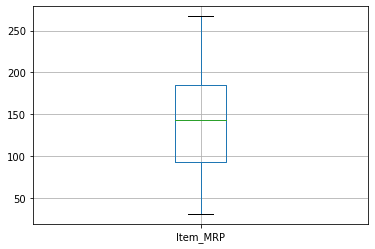

In [103]:
#Boxplot
for x in range(len(num_cols)):
  print(f'{x} - {num_cols[x]}\n')
columnNum = int(input('Choose Column for Boxplot\n'))
columnChoice = num_cols[columnNum]
df.boxplot(column = columnChoice);

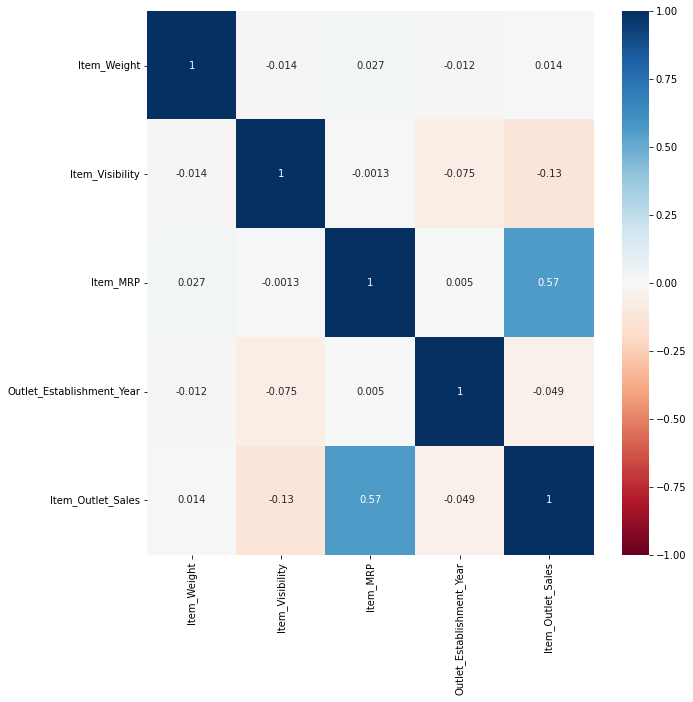

In [106]:
#Heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot = True);